In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as t
from tqdm import tqdm

## Data

In [ ]:
# Rudra: Next experiment make experiments with the effects of the different dividers.
d = t.tensor(np.expand_dims(np.random.uniform(-1, 1, 10_000), axis=1), dtype=t.float32)
train_loader = t.utils.data.DataLoader(
    t.utils.data.TensorDataset(d, d),
    batch_size=64,
    shuffle=True,
)


## Model

In [ ]:
class Model(t.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = t.nn.Linear(1, 64)
        self.layer2 = t.nn.Linear(64, 64)
        self.layer3 = t.nn.Linear(64, 1)
        
    
    def forward(self, x):
        # Rudra: Add "thinking noise" in these layers here
        x = t.relu(self.layer1(x))
        x = t.relu(self.layer2(x))
        return t.clamp(self.layer3(x), -1, 1)

## Training

In [ ]:
# train the model
device = t.device('cuda' if t.cuda.is_available() else 'cpu')

model = Model().to(device)
optimizer = t.optim.Adam(model.parameters(), lr=0.001)

def interpret_feedback(y_pred, y_batch):
    # Rudra: Implement feedback interpretation logic here
    # For example, manipulate based on risk seeking by scaling the loss assymetrically
    criterion = t.nn.MSELoss()
    return criterion(y_pred, y_batch)

# training loop
model.train()

losses = []
for epoch in tqdm(range(100)):
    batch_loss = 0.0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = interpret_feedback(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        batch_loss += loss.item()
    losses.append(batch_loss / len(train_loader))

100%|██████████| 100/100 [00:42<00:00,  2.37it/s]


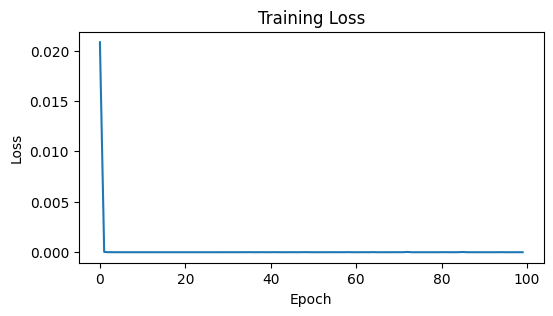

In [6]:
plt.figure(figsize=(6, 3))
plt.plot(np.arange(len(losses)), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

## Make model simulate

In [ ]:
model.eval()
# Rudra: Experiment with different ways of simulating the behavior
with t.no_grad():
    res = model(d.to(device)).cpu().numpy().reshape(-1)

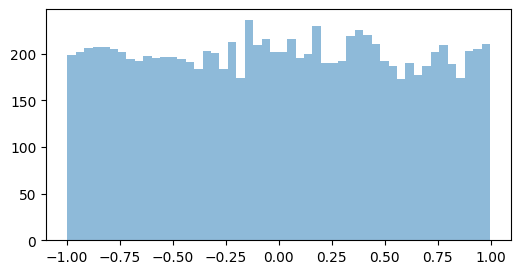

In [19]:
plt.figure(figsize=(6, 3))
plt.hist(res.reshape(-1), bins=50, alpha=0.5, label='Predicted')
plt.show()